<a href="https://colab.research.google.com/github/JoelByron/AI_Camp_TalentoTech/blob/main/notebooks/05_IRIS_clustering_Distances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import seaborn as sns

In [2]:
# Cargar el dataset Iris
iris = datasets.load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
# Crear un DataFrame con las características del dataset
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target  # Agregar columna con las etiquetas originales
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
# Escalar los datos usando StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.iloc[:, :-1])  # Escalar solo las características (sin la columna target)
# :, :-1] todas las filas y columnas

In [6]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [7]:
# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
# eps=0.5: Este parámetro define el radio máximo de búsqueda alrededor de un punto para considerarlo parte de un clúster.
# min_samples=5: Este parámetro define el número mínimo de puntos que deben estar dentro del radio eps para que un punto se considere un "punto central" (core point) y forme un clúster.

dbscan_labels = dbscan.fit_predict(X_scaled)
# #  devuelve el array de la etiqueta si es -1 se considera ruido  y los otros valores 0,1,2,3...... me indcan a que cluster pertenece


# Agregar las etiquetas de los grupos al DataFrame
df['DBSCAN_cluster'] = dbscan_labels

In [8]:
cluster_counts = pd.Series(dbscan_labels).value_counts()
cluster_counts

,count
1,71
0,45
-1,34


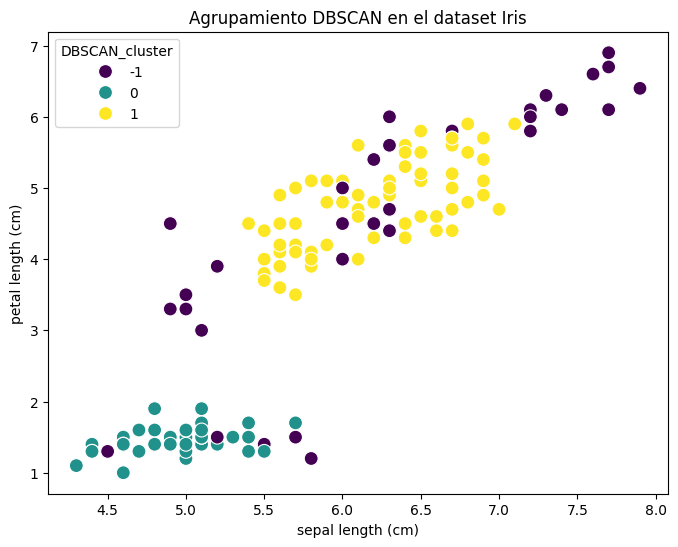

In [9]:
# Visualizar los clústeres usando las primeras dos características (longitud del sépalo y longitud del pétalo)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['sepal length (cm)'], y=df['petal length (cm)'], hue=df['DBSCAN_cluster'], palette="viridis", s=100)
plt.title('Agrupamiento DBSCAN en el dataset Iris')
plt.show()

In [10]:
# Ver las primeras filas del DataFrame con la columna de clústeres
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,DBSCAN_cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


# TAREA Ejercicio (distancias, agrupamiento)
**conjunto** **iris**:

target_names': array(['setosa', 'versicolor', 'virginica']

In [11]:
from sklearn.datasets import load_iris
import pandas as pd


iris = load_iris()


df = pd.DataFrame(data=iris.data, columns=iris.feature_names)


df['species'] = iris.target


df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})


df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Longitud del sépalo

Ancho del sépalo

Longitud del pétalo

Ancho del pétalo

In [12]:
sums = {
    'setosa': [0, 0, 0, 0],
    'versicolor': [0, 0, 0, 0],
    'virginica': [0, 0, 0, 0]
}

counts = {
    'setosa': 0,
    'versicolor': 0,
    'virginica': 0
}

In [13]:
for index, row in df.iterrows():
    species = row['species']
    for i in range(4):
        sums[species][i] += row[i]
    counts[species] += 1

<ipython-input-13-5590cf178438>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sums[species][i] += row[i]


In [14]:
averages = {species: [sums[species][i] / counts[species] for i in range(4)] for species in sums}


In [15]:
for species in averages:
    print(f"Promedio de {species}: {averages[species]}")

Promedio de setosa: [5.005999999999999, 3.428000000000001, 1.4620000000000002, 0.2459999999999999]
Promedio de versicolor: [5.936, 2.7700000000000005, 4.26, 1.3259999999999998]
Promedio de virginica: [6.587999999999998, 2.9739999999999998, 5.552, 2.026]


In [16]:
# Calcular distancias euclidianas entre promedios
distances = {
    ('setosa', 'versicolor'): np.linalg.norm(np.array(averages['setosa']) - np.array(averages['versicolor'])),
    ('setosa', 'virginica'): np.linalg.norm(np.array(averages['setosa']) - np.array(averages['virginica'])),
    ('versicolor', 'virginica'): np.linalg.norm(np.array(averages['versicolor']) - np.array(averages['virginica'])),
}

# Imprimir distancias
for (species1, species2), distance in distances.items():
    print(f"Distancia euclidiana entre {species1} y {species2}: {distance:.4f}")

Distancia euclidiana entre setosa y versicolor: 3.2083
Distancia euclidiana entre setosa y virginica: 4.7545
Distancia euclidiana entre versicolor y virginica: 1.6205


In [17]:
#Distancia de Manhattan
def distancia_manhattan(p1, p2):
    return np.sum(np.abs(p1 - p2))

# Distancia Euclidiana
def distancia_euclidiana(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2))

 # Distancia de Canberra
def distancia_canberra(p1, p2):
    denominador = np.abs(p1) + np.abs(p2)
    denominador[denominador == 0] = 1e-10  # o un valor pequeño
    return np.sum(np.abs(p1 - p2) / denominador)

#  Distancia de Chebyshev
def distancia_chebyshev(p1, p2):
    return np.max(np.abs(p1 - p2))

# Distancia del Coseno
def distancia_coseno(p1, p2):
    return 1 - np.dot(p1, p2) / (np.linalg.norm(p1) * np.linalg.norm(p2))

# Distancia de Hamming
def distancia_Hamming(p1, p2):
    return np.sum(p1 != p2)

In [18]:
# Calcular y almacenar las distancias
distancias = {
    'manhattan': {
        'setosa_versicolor': distancia_manhattan(np.array(averages['setosa']), np.array(averages['versicolor'])),
        'setosa_virginica': distancia_manhattan(np.array(averages['setosa']), np.array(averages['virginica'])),
        'versicolor_virginica': distancia_manhattan(np.array(averages['versicolor']), np.array(averages['virginica'])),
    },
    'euclidiana': {
        'setosa_versicolor': distancia_euclidiana(np.array(averages['setosa']), np.array(averages['versicolor'])),
        'setosa_virginica': distancia_euclidiana(np.array(averages['setosa']), np.array(averages['virginica'])),
        'versicolor_virginica': distancia_euclidiana(np.array(averages['versicolor']), np.array(averages['virginica'])),
    },
    'canberra': {
        'setosa_versicolor': distancia_canberra(np.array(averages['setosa']), np.array(averages['versicolor'])),
        'setosa_virginica': distancia_canberra(np.array(averages['setosa']), np.array(averages['virginica'])),
        'versicolor_virginica': distancia_canberra(np.array(averages['versicolor']), np.array(averages['virginica'])),
    },
    'chebyshev': {
        'setosa_versicolor': distancia_chebyshev(np.array(averages['setosa']), np.array(averages['versicolor'])),
        'setosa_virginica': distancia_chebyshev(np.array(averages['setosa']), np.array(averages['virginica'])),
        'versicolor_virginica': distancia_chebyshev(np.array(averages['versicolor']), np.array(averages['virginica'])),
    },
    'coseno': {
        'setosa_versicolor': distancia_coseno(np.array(averages['setosa']), np.array(averages['versicolor'])),
        'setosa_virginica': distancia_coseno(np.array(averages['setosa']), np.array(averages['virginica'])),
        'versicolor_virginica': distancia_coseno(np.array(averages['versicolor']), np.array(averages['virginica'])),
    },
    'hamming': {
        'setosa_versicolor': distancia_Hamming(np.array(averages['setosa']), np.array(averages['versicolor'])),
        'setosa_virginica': distancia_Hamming(np.array(averages['setosa']), np.array(averages['virginica'])),
        'versicolor_virginica': distancia_Hamming(np.array(averages['versicolor']), np.array(averages['virginica'])),
    }
}

# Imprimir todas las distancias
for distancia, valores in distancias.items():
    print(f"\nDistancias de {distancia.capitalize()}:")
    for par, valor in valores.items():
        print(f"Entre {par.replace('_', ' y ')}: {valor:.4f}")


Distancias de Manhattan:
Entre setosa y versicolor: 5.4660
Entre setosa y virginica: 7.9060
Entre versicolor y virginica: 2.8480

Distancias de Euclidiana:
Entre setosa y versicolor: 3.2083
Entre setosa y virginica: 4.7545
Entre versicolor y virginica: 1.6205

Distancias de Canberra:
Entre setosa y versicolor: 1.3672
Entre setosa y virginica: 1.5739
Entre versicolor y virginica: 0.4281

Distancias de Chebyshev:
Entre setosa y versicolor: 2.7980
Entre setosa y virginica: 4.0900
Entre versicolor y virginica: 1.2920

Distancias de Coseno:
Entre setosa y versicolor: 0.0755
Entre setosa y virginica: 0.1119
Entre versicolor y virginica: 0.0043

Distancias de Hamming:
Entre setosa y versicolor: 4.0000
Entre setosa y virginica: 4.0000
Entre versicolor y virginica: 4.0000


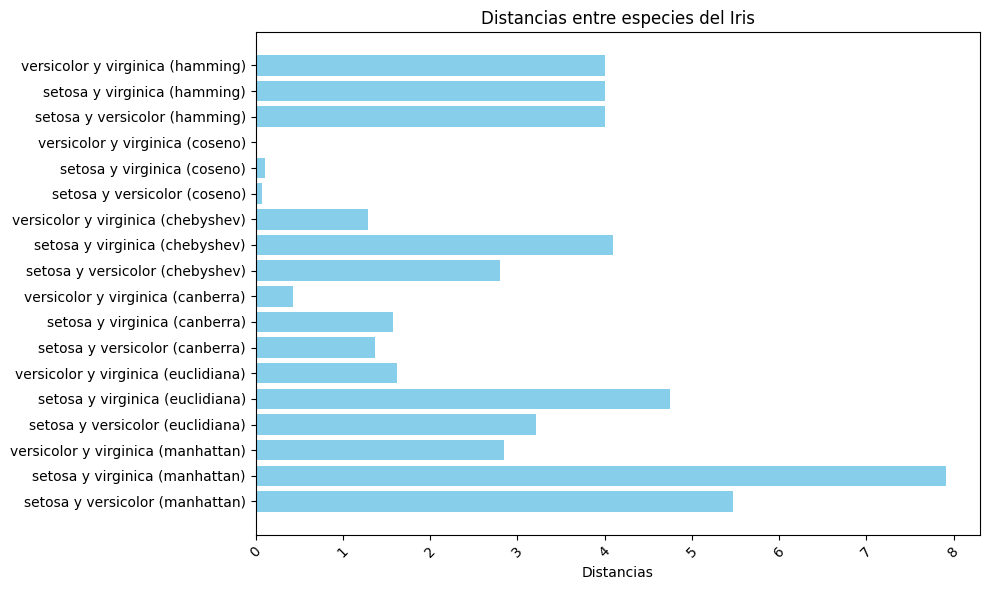

In [19]:
# Preparar datos para graficar
labels = []
values = []
for distancia, pares in distancias.items():
    for par, valor in pares.items():
        labels.append(f"{par.replace('_', ' y ')} ({distancia})")
        values.append(valor)

# Graficar
plt.figure(figsize=(10, 6))
plt.barh(labels, values, color='skyblue')
plt.xlabel('Distancias')
plt.title('Distancias entre especies del Iris')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Preguntas:**

**¿Puede un modelo agrupar datos con base en estas medidas?**
**¿Si no se tuviese la especie de la flor como dato en el dataset, se podría encontrar cuántas especies existen?** **¿Cómo se emplearía la medida de distancia para ese fin?**

Respuesta:

En el aprendizaje no supervisado es fundamental este concepto y si un modelo puede agrupar datos utilizando medidas de distancia, 1 usando un algoritmo de agrupamiento, calculando las distancias y definiendo la estructura de los clusters

usando el metodo de elbow method metodo del codo

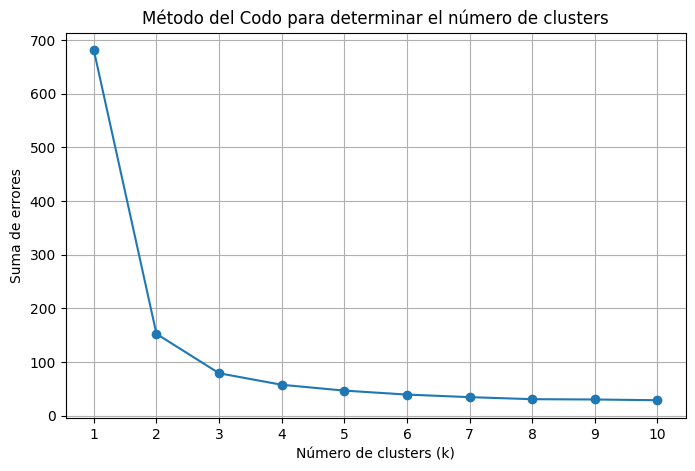

In [20]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Cargar el dataset Iris
iris = load_iris()
data = iris.data

# Aplicar K-means con un número de clusters que varies para ver la suma de errores
inertia = []
k_values = range(1, 11)  # Probar valores de k de 1 a 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)  # Guardar la suma de errores

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Método del Codo para determinar el número de clusters')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Suma de errores')
plt.xticks(k_values)
plt.grid()
plt.show()

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN

iris = load_iris()
X = iris.data
y = iris.target

In [22]:
#Escalar los datos
caler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [23]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [24]:
#PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [25]:
gmm = GaussianMixture(n_components=3)  # Definimos 3 clusters
gmm_labels = gmm.fit_predict(X_scaled)

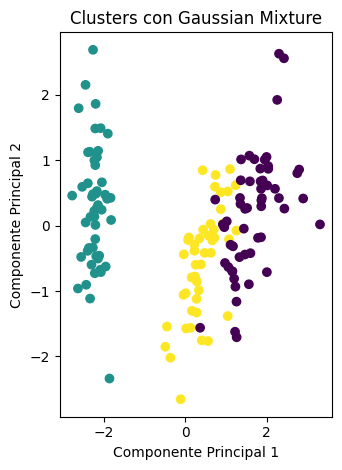

In [26]:
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='viridis')
plt.title('Clusters con Gaussian Mixture')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

plt.tight_layout()
plt.show()

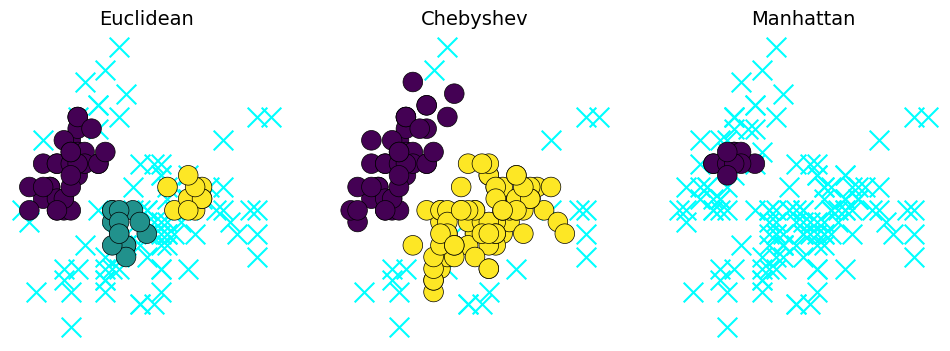

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Cargar el dataset Iris
iris_data = load_iris()
X = iris_data.data  # Datos
y = iris_data.target  # Etiquetas (no se usan en clustering)

# Escalar los datos para DBSCAN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Identificar clusters con diferentes métricas de distancia
distancias = ["euclidean", "chebyshev", "manhattan"]

fig = plt.figure(figsize=(12, 4))
plt.set_cmap("plasma")
for d in range(len(distancias)):
    clusters = DBSCAN(eps=0.5, min_samples=10, metric=distancias[d]).fit_predict(X_scaled)
    ax = fig.add_subplot(1, 3, d+1)

    # Puntos considerados ruido
    ax.scatter(X_scaled[clusters == -1][:, 0], X_scaled[clusters == -1][:, 1],
               c="cyan", s=200, marker="x", label="Ruido")

    # Puntos pertenecientes a clusters
    ax.scatter(X_scaled[clusters >= 0][:, 0], X_scaled[clusters >= 0][:, 1],
               c=clusters[clusters >= 0], s=200, linewidth=0.5, edgecolors="black", cmap='viridis')

    ax.set_title(distancias[d].capitalize(), fontsize=14)
    ax.axis("off")

plt.show()